## Example for Prediction (Part 3)

#### **TO DO**:
- Split dataset in train/test
- Prediction after feature importance

[Interactive Widgets](https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/): [Widget List](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) ; [Using Interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

[graphviz](https://graphviz.readthedocs.io/en/stable/manual.html)


Filename:  C:/Users/JTavares/Documents/GitHub/Tese/3/Dados de defeito enviados - processed.csv

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn import metrics
from IPython.display import display, clear_output, Markdown

from google.colab import files
import io

In [3]:
!ls "/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/test - processed 1.csv"

'/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/test - processed 1.csv'


### Import CSV

In [4]:
path = "/content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/test - processed 1.csv"

print("Filename: ", path)

df = pd.read_csv(path)

display(df.head())
print("Shape:", df.shape)

Filename:  /content/gdrive/MyDrive/IST/0 JT/Ano5Sem2/Tese/Dados/test - processed 1.csv


,index,Ordem,n_operations,Tipo de operação,Tipo de operação n2,Qtd.ordem,out_Qtd.ordem,dif,out_defects,CT,...,car1,car2,esm,dim1_1,dim1_2,car1_1,f_prep,li_bd,var,outliers
0,6,1000234824,1,APLICAÇÃO DE VERNIZ,1ª APLICAÇÃO DE VERNIZ OURO INTERIOR,5305,5305,63,63,LE04,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,1.187559,False
1,7,1000234824,2,APLICAÇÃO DE VERNIZ,2ª APLICAÇÃO DE VERNIZ OURO INTERIOR,5242,5242,11,11,LE04,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,0.209844,False
2,8,1000234824,3,APLICAÇÃO DE ESMALTE BRANCO,APLICAÇÃO DE ESMALTE BRANCO,5231,5231,71,71,LE06,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,1.357293,False
3,9,1000234824,4,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ DE ACABAMENTO,5160,5160,181,181,LI05,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,3.507752,False
4,10,1000234824,5,CORTE DE FOLHA,CORTE DE FOLHA,4979,4979,22,22,CS11,...,"E2,0",TS275,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,0.441856,False


Shape: (27032, 43)


In [6]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

data = df.keys()
dtypes = df.dtypes
features = [out for out in data if "out_" not in out]
output = [out for out in data if "out_" in out]
checkboxes = [widgets.Checkbox(value=True, description=label) for label in features]
out_checkboxes = [widgets.Checkbox(value=True, description=label) for label in output]
out_options = [widgets.Dropdown(options=['sum', 'mean', 'max', 'min'], description='Aggregate options:') for x in output]
out_qt = widgets.ToggleButtons(options=output, description='Detected defects:', style = {'description_width': 'initial'})
butt = widgets.Button(description="OK", icon="check")


lst = [[], [], []] ; out_lst = [[], []]
for i in range(len(checkboxes)):
    lst[i%3].append(checkboxes[i])

# for i in range(len(out_checkboxes)):
#     out_lst[0].append(out_checkboxes[i])
#     out_lst[1].append(out_options[i])


tab1 = widgets.HBox([widgets.VBox(lst[0]), widgets.VBox(lst[1]), widgets.VBox(lst[2])])
tab2 = widgets.HBox([out_qt]) # widgets.VBox(out_lst[0]), widgets.VBox(out_lst[1]), out_qt])

outt = widgets.Output()
selected_features = []
selected_output = []

def on_check_clicked(b):
    with outt:
        clear_output()
        global selected_data
        global selected_output
        selected_data = []
        selected_output = []
        for i in range(0, len(checkboxes)):
            if checkboxes[i].value == True:
                selected_data = selected_data + [checkboxes[i].description]
#         for i in range(0, len(out_checkboxes)):
#             if out_checkboxes[i].value == True:
#                 selected_output[out_checkboxes[i].description] = out_options[i].value
        if output[0] != out_qt.value:
            selected_output = [out_qt.value, output[0]]
        else: 
            selected_output = output
            
        print("Selected data: ", selected_data)
        print("Selected output: ", selected_output)
        
        


tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Features')
tab.set_title(1, 'Output')
widgets.VBox(children=[tab])
        
butt.on_click(on_check_clicked)
display(tab, butt, outt)

Button(description='OK', icon='check', style=ButtonStyle())

Output()

### Create measure ratios

In [7]:
df["percentage"] = df[selected_output[0]]/df[selected_output[1]]*100

# create ratio from percentage
total_percentage = df["percentage"].sum()

df["ratio"] = df["percentage"]/total_percentage * 100

total_ratio = df["ratio"].max()
print("Max value:", total_ratio)
df1 = df[df['percentage'] >= 2]


Max value: 0.16858682088111965


In [8]:
df1.head()

,index,Ordem,n_operations,Tipo de operação,Tipo de operação n2,Qtd.ordem,out_Qtd.ordem,dif,out_defects,CT,...,esm,dim1_1,dim1_2,car1_1,f_prep,li_bd,var,outliers,percentage,ratio
3,9,1000234824,4,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ DE ACABAMENTO,5160,5160,181,181,LI05,...,ESMALTE 135.262,286.0,NaN,LI-LD,0.0,0.0,3.507752,False,3.507752,0.008542
10,18,1000239079,4,EMBALAMENTO,EMBALAMENTO,850,850,54,54,EM01,...,ESM BRANCO HB-367 A,188.0,197.0,BD-TL,0.0,1.0,6.352941,False,6.352941,0.015470
14,24,1000241762,2,EMBALAMENTO,EMBALAMENTO,2338,2338,1548,1548,EM01,...,NaN,284.0,445.0,BD-CY,0.0,1.0,66.210436,False,66.210436,0.161232
15,25,1000241890,1,APLICAÇÃO DE TINTA DE IMPRESSÃO,APLICAÇÃO DE TINTA DE IMPRESSÃO,476,476,16,16,LI17,...,ESM BRANCO HB-367 A,99.0,118.0,BD-CY,0.0,1.0,3.361345,False,3.361345,0.008185
18,28,1000242103,2,APLICAÇÃO DE TINTA DE IMPRESSÃO,APLICAÇÃO DE TINTA DE IMPRESSÃO,3212,3212,317,317,LI15,...,ESM BRANCO HB-367 A,190.0,65.0,BD-CY,0.0,1.0,9.869240,False,9.869240,0.024033


In [10]:
print(df.isnull().sum())
# df.dropna(subset = ["Caracteristica A", "T (ºC)", "%HR"], inplace=True)
df.dropna(subset = ["Difference"], inplace=True)
df['dim1_2'].fillna(0, inplace=True)

index                     0
Ordem                     0
n_operations              0
Tipo de operação          0
Tipo de operação n2       0
Qtd.ordem                 0
out_Qtd.ordem             0
dif                       0
out_defects               0
CT                        0
ab                        0
ac                        0
Grupo Mercadorias         0
ad                        0
ae                        0
af                        0
Hierarquia prod           0
Material                  0
Qtd.ordem_old             0
Qtd.confirmada            0
Iníc.real                 0
DtaRealFim                0
Mês                       0
DD                        0
controlo                  0
data_teste                0
start_date              765
end_date                765
Difference              765
week_day                765
dim1                      0
dim2                      0
dim3                      0
car1                      0
car2                      0
esm                 

In [14]:
print(df['car1_1'].value_counts())
df = df[df['car1_1'] == 'BD-AE']

BD-AE       12809
BD-CY        3903
LI-LD        2709
BD-TC        1716
LI-BT        1618
BD-RC        1072
LI-TP        1024
BD-TL         959
LI-RG         324
LI-BT/LD      115
LI-LD/BT       15
LI-CI           3
Name: car1_1, dtype: int64


### Prepare targets (for classification)

Prepare Categorical Output by defining n categories for the target.


- [ ] 6 Sigma --> how many categories?
0. 0% (no defects)
1. defects > 69%
2. defects: 69%-31%
3. defects: 31%-6,7%
4. defects: 6,7%-0.62%
5. defects: 0.62%-0.023%
6. defects: 0.023%-0%

- [ ] 2-4 categories

In [15]:
w_bins = widgets.RadioButtons(
    options=['2 levels', '3 levels', '6 Sigma levels'],
    description='Bins:',
    disabled=False
)

w_bins

RadioButtons(description='Bins:', options=('2 levels', '3 levels', '6 Sigma levels'), value='2 levels')

In [16]:
y_mean = df['percentage'].mean()
y_max = df['percentage'].max()
print("Percentage mean: ", y_mean)
print("Percentage max: ", y_max)

bins_6s = [-0.0001, 0, 0.023, 0.62, 6.7, 31, 69, 100]; bins_2 = [-1, 0, y_max] ; bins_3 = [-1, 0, y_mean, y_max]
labels_6s = [0, 1, 2, 3, 4, 5, 6] ; labels_2 = [0, 1] ; labels_3 = [0, 1, 2]

if w_bins.value == "2 levels":
    bins = bins_2 ; labels = labels_2
elif w_bins.value == "3 levels":
    bins = bins_3 ; labels = labels_3
elif w_bins.value == "6 Sigma levels":
    bins = bins_6s ; labels = labels_6s
else:
    print("Choose bins levels")

print("Bins:", w_bins.value)

df['binned'] = pd.cut(df['percentage'], bins=bins, labels=labels)

if df["binned"].isnull().sum() > 0:
    df.dropna(subset = ["binned"], inplace=True)

display(df.head())
print(df.shape)

Percentage mean:  1.307544910972306
Percentage max:  67.24358974358975
Bins: 2 levels


,index,Ordem,n_operations,Tipo de operação,Tipo de operação n2,Qtd.ordem,out_Qtd.ordem,dif,out_defects,CT,...,dim1_1,dim1_2,car1_1,f_prep,li_bd,var,outliers,percentage,ratio,binned
36,47,1000242374,1,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ OURO,966,966,0,0,LE04,...,52.0,132.0,BD-AE,0.0,1.0,0.000000,False,0.000000,0.000000,0
37,48,1000242374,2,APLICAÇÃO DE ESMALTE BRANCO,APLICAÇÃO DE ESMALTE BRANCO,966,966,11,11,LE06,...,52.0,132.0,BD-AE,0.0,1.0,1.138716,False,1.138716,0.002773,1
38,49,1000242374,3,APLICAÇÃO DE TINTA DE IMPRESSÃO,APLICAÇÃO DE TINTA DE IMPRESSÃO,955,955,22,22,LI15,...,52.0,132.0,BD-AE,0.0,1.0,2.303665,False,2.303665,0.005610,1
39,50,1000242374,4,APLICAÇÃO DE VERNIZ,APLICAÇÃO DE VERNIZ DE ACABAMENTO,933,933,62,62,LE06,...,52.0,132.0,BD-AE,0.0,1.0,6.645230,False,6.645230,0.016182,1
40,51,1000242374,5,CORTE DE FOLHA,CORTE DE FOLHA,871,871,0,0,CS16,...,52.0,132.0,BD-AE,0.0,1.0,0.000000,False,0.000000,0.000000,0


(12809, 46)


#### Convert Imbalanced Dataset into Balanced Dataset
if needed

[link](https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5)

In [17]:
df_count =df["binned"].value_counts()

display(df_count)

0    7019
1    5790
Name: binned, dtype: int64

In [26]:
# load dataset
data = df

selected_data = ['Mês', 'dim1', 'Qtd.ordem', "Tipo de operação", 
'dim2', 'dim3', 'dim1_1', 'Difference'] # 'car1_1'

# feature matrix
X = data[selected_data]

# target vector
y = df['binned']

display(X.head())
print("X (shape):", X.shape, "; Y (shape):", y.shape)

,Mês,dim1,Qtd.ordem,Tipo de operação,dim2,dim3,dim1_1,Difference
36,5.0,833.0,966,APLICAÇÃO DE VERNIZ,813.2,0.18,52.0,209.0
37,5.0,833.0,966,APLICAÇÃO DE ESMALTE BRANCO,813.2,0.18,52.0,209.0
38,5.0,833.0,955,APLICAÇÃO DE TINTA DE IMPRESSÃO,813.2,0.18,52.0,209.0
39,5.0,833.0,933,APLICAÇÃO DE VERNIZ,813.2,0.18,52.0,209.0
40,5.0,833.0,871,CORTE DE FOLHA,813.2,0.18,52.0,209.0


X (shape): (12809, 8) ; Y (shape): (12809,)


### Encode Categorical Data (inputs)

We need to encode our categorical data to numbers. There are 3 techniques to encode data: 
1. **Integer Encoding**
2. **One Hot Encoding**
3. **Learned Embedding**

[Categorical data for deep learning](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

First, *One Hot Enconding* was tested. For this task, the numeric and categorical features were defined.

*comment: with this task, the number of features was reduced from 416 to 212*

In [27]:
w_tt = widgets.RadioButtons(
    options=['Random', 'Ordered'],
    description='Train/Test Split:',
    disabled=False,
    style = {'description_width': 'initial'}
)

w_size = widgets.IntSlider(
    value=80,
    min=0,
    max=100,
    step=1,
    description='(%) Training set size:',
    disabled=False,
#     continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(widgets.HBox([w_tt, w_size]))

In [28]:
from sklearn.model_selection import train_test_split

def prepare_inputs(X_train):
    X_train = pd.get_dummies(X_train)
    return X_train

# prepare input data
X_enc = prepare_inputs(X)
y_class = df['binned']

test_size = 1 - (w_size.value/100)

if w_tt.value == "Random":
    shuffle = True
else: shuffle = False

print("Shuffle:", shuffle, "; Test size:", test_size)
    
# shuffle is used to randomly mix the dataset
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_class, test_size=test_size, shuffle=shuffle)


print("\nX (shape):", X_train.shape, X_test.shape)
print("y (shape):", y_train.shape, y_test.shape)

display(X_train.head())

Shuffle: True ; Test size: 0.19999999999999996

X (shape): (10247, 12) (2562, 12)
y (shape): (10247,) (2562,)


,Mês,dim1,Qtd.ordem,dim2,dim3,dim1_1,Difference,Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO,Tipo de operação_APLICAÇÃO DE TINTA DE IMPRESSÃO,Tipo de operação_APLICAÇÃO DE VERNIZ,Tipo de operação_CORTE DE FOLHA,Tipo de operação_EMBALAMENTO
9530,5.0,833.0,3105,797.0,0.17,52.0,2.0,0,1,0,0,0
26925,12.0,850.0,1904,910.0,0.14,57.0,2.0,0,0,1,0,0
8035,5.0,856.0,1353,731.4,0.18,45.0,8.0,0,0,1,0,0
24553,11.0,833.0,2352,734.9,0.18,65.0,6.0,0,0,0,1,0
26847,12.0,833.0,41000,797.0,0.18,52.0,0.0,1,0,0,0,0


### Select score to be evaluated

F1 score was selected as evaluation criterion

--> criar widget para selecionar critério: F1, F2, F0.5, Accuracy, Balanced_accuracy

In [29]:
from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')

scoring = widgets.Dropdown(
    options=['balanced_accuracy', 'accuracy', 'f1', 'f1_weighted', 'f1_macro', 'roc_auc', 'average_precision'],
    description='Scoring:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_cv = widgets.IntSlider(
    value=5, min=2, max=10, step=1,
    description='K-Folds (CV):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Cross Validation (CV)"))
display(dt_cv)
display(Markdown("### Evaluation criteria"))
display(scoring)

### Cross Validation (CV)

IntSlider(value=5, continuous_update=False, description='K-Folds (CV):', max=10, min=2, style=SliderStyle(desc…

### Evaluation criteria

Dropdown(description='Scoring:', options=('balanced_accuracy', 'accuracy', 'f1', 'f1_weighted', 'f1_macro', 'r…

## Recursive Feature Elimination (RFE)

### Select parameters

In [30]:
dt_criterion = widgets.Dropdown(
    options=['gini', 'entropy'],
    description='Criterion:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_depth = widgets.Dropdown(
    options=[3, 4, 6, 8, 10, 15, None],
    value=10,
    description='Max Depth:',
    disabled=False,
    style = {'description_width': 'initial'}
)

dt_weighted = widgets.Checkbox(
    value=False,
    description='class_weighted',
    disabled=False,
    indent=False,
    style = {'description_width': 'initial'}
)

dt_min_split = widgets.IntSlider(
    value=2,
    min=2,
    max=10,
    step=1,
    description='Min samples split:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

dt_min_leaf = widgets.IntSlider(
    value=1,
    min=1,
    max=10,
    step=1,
    description='Min samples leaf:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial'}
)

display(Markdown("### Parameters for Decision Tree"))
display(widgets.VBox([widgets.HBox([dt_criterion, dt_depth]),
                      widgets.HBox([dt_min_leaf, dt_min_split]),
                      widgets.HBox([dt_weighted])]))

### Parameters for Decision Tree

In [31]:
# dt_criterion, dt_depth, dt_min_leaf, dt_min_split, dt_bootstrap, dt_weighted

criterion = str(dt_criterion.value)
max_depth = dt_depth.value
min_samples_split = int(dt_min_split.value)
min_samples_leaf = int(dt_min_leaf.value)
if dt_weighted.value == True: class_weight = 'balanced'
else: class_weight = None

{'criterion': criterion,
'max_depth': max_depth,
'class_weight': class_weight,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

{'criterion': 'gini',
 'max_depth': 10,
 'class_weight': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

### RFE (with Decision Tree)

Evaluation criteria:  balanced_accuracy
>8 0.674 (0.010)
>10 0.679 (0.009)
>12 0.678 (0.010)
>14 0.679 (0.008)
>16 0.678 (0.008)
>18 0.678 (0.013)


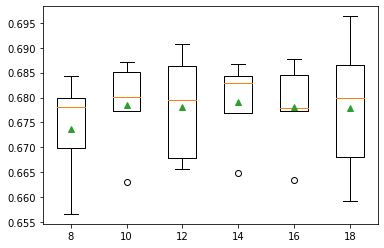

In [34]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# decision tree for feature importance on a classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(8,20,2):
		rfe = RFE(estimator=DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, class_weight=class_weight,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

i = 10;

# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	# lr
# 	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# perceptron
# 	rfe = RFE(estimator=Perceptron(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# cart
# 	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# rf
# 	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# gbm
# 	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=i)
# 	model = DecisionTreeClassifier()
# 	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	return models


# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring=scoring.value, cv=dt_cv.value, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
print("Evaluation criteria: ", scoring.value)
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [35]:
rfe = RFE(estimator=DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, class_weight=class_weight,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf), n_features_to_select=18)

# train the model
rfe.fit(X_train,y_train)

ind = []
for c,s in zip(X_enc.columns, rfe.support_):
  if s:
      ind.append(c)

print("Features: ", ind)

Features:  ['Mês', 'dim1', 'Qtd.ordem', 'dim2', 'dim3', 'dim1_1', 'Difference', 'Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO', 'Tipo de operação_APLICAÇÃO DE TINTA DE IMPRESSÃO', 'Tipo de operação_APLICAÇÃO DE VERNIZ', 'Tipo de operação_CORTE DE FOLHA', 'Tipo de operação_EMBALAMENTO']


### Preprocessing data
[preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

Standardization, or mean removal and variance scaling

In [36]:
from sklearn import preprocessing

# feature matrix
feature_selected = ind
X_enc_fsel = X_enc[feature_selected]

scaler = preprocessing.StandardScaler().fit(X_enc_fsel)
X_scaled = pd.DataFrame(scaler.transform(X_enc_fsel))

# display(X_scaled)

# shuffle is used to randomly mix the dataset
X_train_fsel, X_test_fsel, y_train, y_test = train_test_split(X_scaled, y_class, test_size=test_size, shuffle=shuffle)

print("Shuffle:", shuffle, "; Test size:", test_size)
print("\nFeature Selection --> X_train (shape):", X_train_fsel.shape, "; X_train (shape):", X_test_fsel.shape)
display(X_train_fsel.head())

Shuffle: True ; Test size: 0.19999999999999996

Feature Selection --> X_train (shape): (10247, 12) ; X_train (shape): (2562, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
6433,0.125658,-0.700730,-0.227864,-0.743785,0.330625,1.462640,-0.310559,-0.295709,1.417117,-0.757738,-0.426578,-0.271109
2931,-1.025875,-0.807157,4.709600,-1.060322,2.415451,1.462640,-0.190292,3.381704,-0.705658,-0.757738,-0.426578,-0.271109
4765,-0.737992,-0.700730,-0.537705,-0.713433,0.330625,-0.414060,-0.430825,-0.295709,1.417117,-0.757738,-0.426578,-0.271109
2955,-1.025875,1.347984,-0.395439,0.542595,1.720509,0.307747,-0.190292,-0.295709,1.417117,-0.757738,-0.426578,-0.271109
6155,-0.162225,1.906724,0.132190,-0.986608,-0.364317,-0.847145,0.050242,-0.295709,-0.705658,1.319717,-0.426578,-0.271109


### SVC

In [38]:
#Import SVC model
from sklearn.svm import SVC

param_grid = {'C':[1,10,100],'gamma':['scale','auto'], 'kernel':['linear','rbf']}

#Create SVC
models[0] = SVC(gamma='auto', class_weight='balanced', kernel='linear', C=1)
models[1] = SVC(gamma='scale', class_weight='balanced', kernel='linear', C=1)
models[2] = SVC(gamma='auto', class_weight='balanced', kernel='rbf', C=1)
models[3] = SVC(gamma='scale', class_weight='balanced', kernel='rbf', C=1)
models[4] = SVC(gamma='auto', class_weight='balanced', kernel='linear', C=10)
models[5] = SVC(gamma='scale', class_weight='balanced', kernel='linear', C=10)
models[6] = SVC(gamma='auto', class_weight='balanced', kernel='rbf', C=10)
models[7] = SVC(gamma='scale', class_weight='balanced', kernel='rbf', C=10)
models[8] = SVC(gamma='auto', class_weight='balanced', kernel='linear', C=100)
models[9] = SVC(gamma='scale', class_weight='balanced', kernel='linear', C=100)
models[10] = SVC(gamma='auto', class_weight='balanced', kernel='rbf', C=100)
models[11] = SVC(gamma='scale', class_weight='balanced', kernel='rbf', C=100)

# #Train the model using the training sets
# svc.fit(X_train_fsel, y_train)

### Prediction

Source: https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/ ; https://rasbt.github.io/mlxtend/

In [42]:
for i in range(12):
    model = models[i]
    #Train the model using the training sets
    model.fit(X_train_fsel, y_train)
    # make a prediction
    y_pred = model.predict(X_test_fsel)

    print("Model:", model)
    print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
    print("\n", metrics.classification_report(y_test, y_pred))

    # Creating the confusion matrix (binary classification)
    cm = metrics.confusion_matrix(y_test, y_pred)
    # Assigning columns names
    cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

    display(cm_df)
    print("Selected features: ", feature_selected)
    print("Feature importance: ", model.feature_importances_)
    print("\n\n")

Model: SVC(C=1, class_weight='balanced', gamma='auto', kernel='linear')
Accuracy score: 0.6612021857923497

               precision    recall  f1-score   support

           0       0.88      0.45      0.60      1423
           1       0.57      0.92      0.71      1139

    accuracy                           0.66      2562
   macro avg       0.73      0.69      0.65      2562
weighted avg       0.74      0.66      0.65      2562



,Predicted Negative,Predicted Positive
Actual Negative,642,781
Actual Positive,87,1052


Selected features:  ['Mês', 'dim1', 'Qtd.ordem', 'dim2', 'dim3', 'dim1_1', 'Difference', 'Tipo de operação_APLICAÇÃO DE ESMALTE BRANCO', 'Tipo de operação_APLICAÇÃO DE TINTA DE IMPRESSÃO', 'Tipo de operação_APLICAÇÃO DE VERNIZ', 'Tipo de operação_CORTE DE FOLHA', 'Tipo de operação_EMBALAMENTO']


AttributeError: ignored

###SVC (Grid Search)

In [40]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
param_grid = {'C':[1,10,100],'gamma':['scale','auto'], 'kernel':['linear','rbf'], 'class_weight':['balanced']}


print("parameters: ", param_grid)
#passing the scoring function in the GridSearchCV
svc_gs = GridSearchCV(SVC(), param_grid, scoring=scoring.value, verbose = 4, cv=3, n_jobs=-1)

svc_gs.fit(X_train, y_train)

#converting the clf.cv_results to dataframe
df_results=pd.DataFrame.from_dict(svc_gs.cv_results_)

parameters:  {'C': [1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced']}
Fitting 3 folds for each of 12 candidates, totalling 36 fits


KeyboardInterrupt: ignored


### Print results and specifications

Write results in file: *results.txt*

In [ ]:
for writing_model in [base_model, best_grid, best_random]:

  # make a prediction
  y_pred = writing_model.predict(X_test)

  accuracy_score = metrics.accuracy_score(y_test, y_pred)
  evaluation = metrics.classification_report(y_test, y_pred)
  
  # # Creating the confusion matrix (binary classification)
  # cm = metrics.confusion_matrix(y_test, y_pred)
  # # Assigning columns names
  # cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

  # Creating the confusion matrix (multi-class classification)
  from mlxtend.evaluate import confusion_matrix
  cml2 = confusion_matrix(y_target=y_test, y_predicted=y_pred, binary=True, positive_label=0)

  # Assigning columns names
  cml2_df = pd.DataFrame(cml2, columns = ['Predicted Positive', 'Predicted Negative'], index = ['Actual Positive', 'Actual Negative'])

  with open('results.txt', 'a') as f:
      f.write('-'*50)
      f.write("\n\nModel: %s" % writing_model)
      f.write("\n\nRandom: %s; Test size: %d" % (shuffle, test_size))
      f.write("\nMax score: %d ; (Feature: %s)" % (max_v*100,imax))

      f.write("\n\nAccuracy score: %d" % accuracy_score)
      f.write("\nScoring criteria optimized: %s" % scoring.value)
      f.write("\nK-Folds (CV): %s" % dt_cv.value)
      f.write("\n%s" % str(evaluation))
      f.write("\n\nConfusion matrix ")
      # save confusion matrix and slice into four pieces
      # TP = cm[1][1]; TN = cm[0][0] ; FP = cm[0][1] ; FN = cm[1][0]
      TP = cml2[0][0] ; TN = cml2[1][1] ; FP = cml2[1][0] ; FN = cml2[0][1]

      f.write('\nTrue Positives: %d' % TP)
      f.write('\nTrue Negatives: %d' % TN)
      f.write('\nFalse Positives: %d' % FP)
      f.write('\nFalse Negatives: %d\n\n' % FN)
      
  display(Markdown('#### Results'))

  print("Model:", writing_model)
  print("Shuffle:", shuffle, "; Test size:", test_size)
  print("Max score:", max_v*100, "(Feature:", imax, ")")

  print("\nAccuracy score:", accuracy_score)
  print('Scoring criteria optimized: ', scoring.value)
  print('K-Folds (CV):', dt_cv.value)
  print("\n", evaluation)

#### Binary Classification

In [ ]:
# Importing the metrics package from sklearn library
from sklearn import metrics

# Creating the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Assigning columns names
cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])

# Showing the confusion matrix
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,194,41
Actual Positive,13,18


In [ ]:
# save confusion matrix and slice into four pieces
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity (recall)
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TP / float(TP + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) /
(conf_precision + conf_sensitivity))

print('-'*25)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 18
True Negatives: 194
False Positives: 41
False Negatives: 13
-------------------------
Accuracy: 0.8
Mis-Classification: 0.2
Sensitivity: 0.58
Specificity: 0.83
Precision: 0.31
f_1 Score: 0.4


#### Multi-class Classification

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

cml = metrics.confusion_matrix(y_test, y_pred, labels=labels_6s)

# Assigning columns names
cml_df = pd.DataFrame(cml)

# Showing the confusion matrix
# cm_df
display(cml_df)

,0,1,2,3,4,5,6
0,198,0,4,25,0,2,0
1,0,0,0,0,0,0,0
2,2,0,0,3,0,0,0
3,11,0,4,5,0,2,0
4,4,0,0,4,1,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


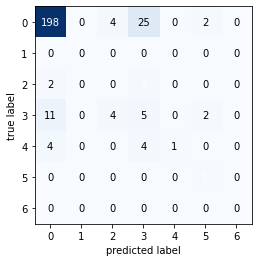

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cml)

# save the figure
plt.savefig(str('plot-'+ model_name + '-cm-1- ' + w_bins.value + '.png'))

plt.show()

In [ ]:
from mlxtend.evaluate import confusion_matrix
cml2 = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred, 
                      binary=True, 
                      positive_label=0)

# Assigning columns names
cml2_df = pd.DataFrame(cml2, columns = ['Predicted Positive', 'Predicted Negative'], index = ['Actual Positive', 'Actual Negative'])

# Showing the confusion matrix
cml2_df

# fig, ax = plot_confusion_matrix(conf_mat=cml2)

# # save the figure
# plt.savefig(str('plot-CART-cm-2-' + 'bins-6s' + '.png'))

# plt.show()

,Predicted Positive,Predicted Negative
Actual Positive,20,17
Actual Negative,31,198


In [ ]:
# save confusion matrix and slice into four pieces
TP = cml2[0][0]
TN = cml2[1][1]
FP = cml2[1][0]
FN = cml2[0][1]

print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))

# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TP / float(TP + FP))

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) /
(conf_precision + conf_sensitivity))

print('-'*25)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 8
True Negatives: 209
False Positives: 27
False Negatives: 22
-------------------------
Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.27
Specificity: 0.89
Precision: 0.23
f_1 Score: 0.25


In [ ]:
# Fazer Feature Importance para modelos com melhores resultados

## Feature Selection 

In [ ]:
# load dataset
data = df

# feature matrix
feature_selected = ind
X_train_fsel = X_train[feature_selected]
X_test_fsel = X_test[feature_selected]

print("\nFeature Selection --> X_train (shape):", X_train_fsel.shape, "; X_train (shape):", X_test_fsel.shape)
display(X_train_fsel.head())


Feature Selection --> X_train (shape): (797, 7) ; X_train (shape): (266, 7)


,Quant. Prod.,Comp.,Espess.,T (ºC),Processo_ P_P1,Caracteristica L_Flo,Caracteristica A_CONC
126,336,30,4.0,19.0,0,0,0
862,50,187,3.0,19.0,1,0,0
491,50,180,5.5,18.0,0,0,0
260,302,120,4.0,9.0,0,0,0
746,104,29,3.0,23.0,0,0,1


Feature: Quant. Prod., Score: 18.47686
Feature: Comp., Score: 8.93835
Feature: Espess., Score: 3.33208
Feature: T (ºC), Score: 5.04452
Feature: Processo_ P_P1, Score: 51.96389
Feature: Caracteristica L_Flo, Score: 3.67350
Feature: Caracteristica A_CONC, Score: 8.57080

Max score: 51.96389144235209 (Feature: Processo_ P_P1 )

Filename:  plot-FSelect-CART- 2 levels.png


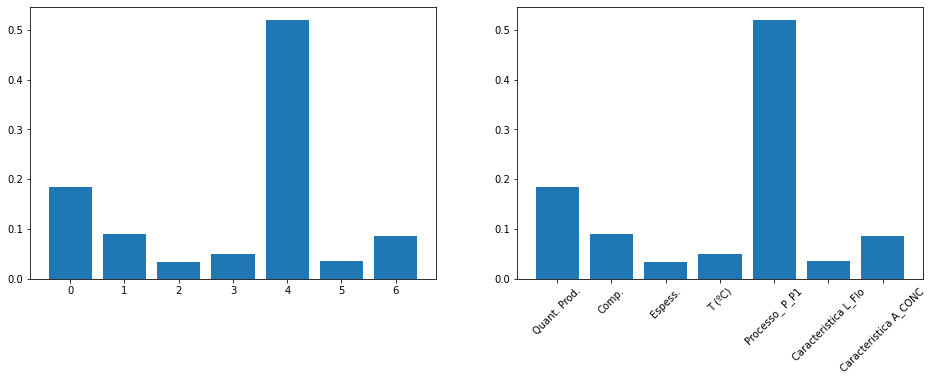

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model_name = "CART"
model_fsel = grid_search.best_estimator_

# fit the model
model_fsel.fit(X_train_fsel, y_train)
# get importance
importance = model_fsel.feature_importances_
indices = np.argsort(importance)[-10:]
ind = [] ; res = [] ; max_v = 0
# summarize feature importance
for c,v in zip(X_train_fsel.columns, importance):
    ind.append(c) ; res.append(v)
    if v > max_v: max_v = v ; imax = c  
    print('Feature: %0s, Score: %.5f' % (c,v*100))
# plot feature importance
fig, (axs1 , axs2) = plt.subplots(1, 2, figsize=(16,5))
axs1.bar([x for x in range(len(importance))], importance)
axs2.bar(ind, res)
plt.xticks(rotation=45)

print("\nMax score:", max_v*100, "(Feature:", imax, ")")

# save the figure
filename = str('plot-FSelect-'+ model_name + '- ' + w_bins.value + '.png')
plt.savefig(filename)
print("\nFilename: ", filename)

plt.show()

In [ ]:
# make a prediction
y_pred = model_fsel.predict(X_test_fsel)

print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("\n", metrics.classification_report(y_test, y_pred))

Accuracy score: 0.8345864661654135

               precision    recall  f1-score   support

           0       0.98      0.84      0.90       244
           1       0.30      0.77      0.44        22

    accuracy                           0.83       266
   macro avg       0.64      0.81      0.67       266
weighted avg       0.92      0.83      0.86       266



### Display Tree

[Visualization of decision trees](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)

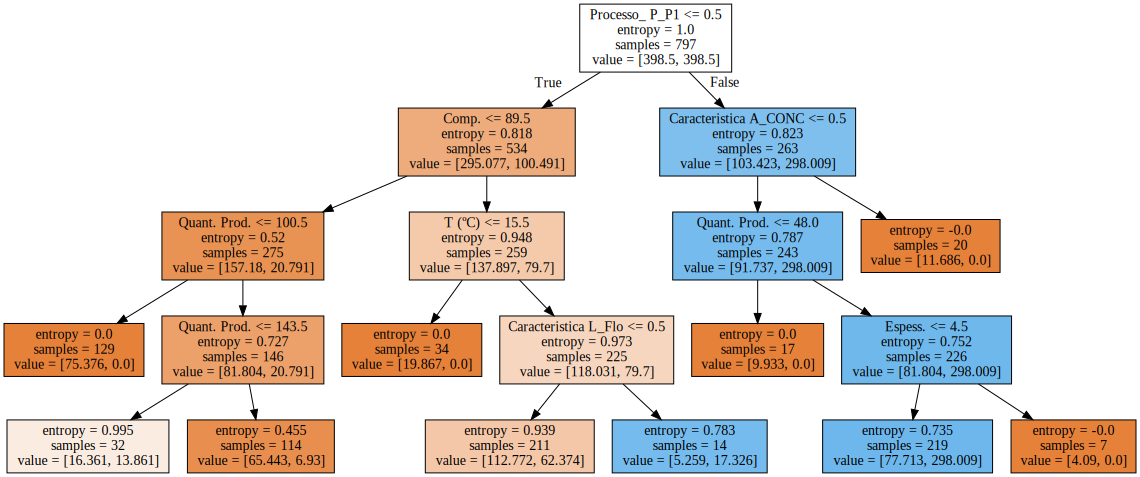

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = X_train_fsel.columns

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=labels, filled = True, max_depth=5))

display(SVG(graph.pipe(format='svg')))

